<a href="https://colab.research.google.com/github/dm-sap/dm-sap/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np    
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import math
from google.colab import drive
import random
from matplotlib.pyplot import figure
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Primo Punto:**

## **Metodo HIT or MISS :**

In [6]:
def f(x): 
  return np.e**(-x**2 / 2)

PUNTI=10000 punti=1612 area=2.418 +/- 0.055
Area teorica: 2.507


Text(0.5, 1.0, 'Integrazione numerica')

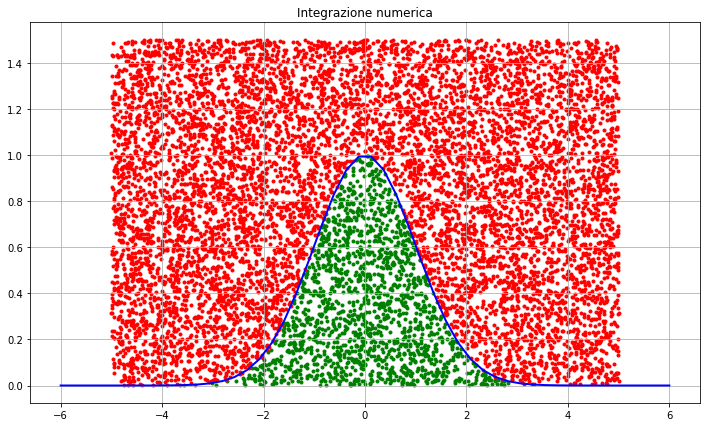

In [18]:
PUNTI=10000
a=-5
b=5
fmax=1.5
AREA=(b-a)*fmax
punti=0
 
xp=[] # ASCISSE CASUALI
yp=[] # ORDINATE CASUALI --- SOTTO IL GRAFICO
xP=[] # ASCISSE CASUALI
yP=[] # ORDINATE CASUALI --- SOPRA IL GRAFICO
 
for p in range(0,PUNTI):
  x=random.uniform(a,b)
  y=random.uniform(0,fmax)
  if y <= f(x):
    punti=punti+1
    xp.append(x) # punto sotto
    yp.append(y) 
  else:
    xP.append(x) # punto sopra
    yP.append(y)
area=(punti/PUNTI) * AREA
sigma= (AREA/PUNTI)*(punti - punti**2/PUNTI)**0.5
print("PUNTI=%d punti=%d area=%.3f +/- %.3f" %(PUNTI,punti,area,sigma))
pi=(2*np.pi)**0.5
print("Area teorica: %.3f" %(pi))
X=np.linspace(a-1,b+1)
yf=[]
for x in X:
    yf.append(f(x))

figure(figsize=(12,7)) 
plt.grid()
plt.plot(X , yf, color="blue" , linewidth="2") # Funzione
plt.scatter(xp, yp, color="green", marker ="."  ) # Sotto...
plt.scatter(xP, yP, color="red"  , marker ="."  ) # Sopra...
plt.title("Integrazione numerica")

## **Metodo VALORI MEDI:**

In [46]:
PUNTI=10000
a=-5
b=5

X = np.random.uniform(a, b, PUNTI)
F = f(X)
area = np.mean(F*(b-a))
print(area)

2.510142971340035


#**Terza Parte**

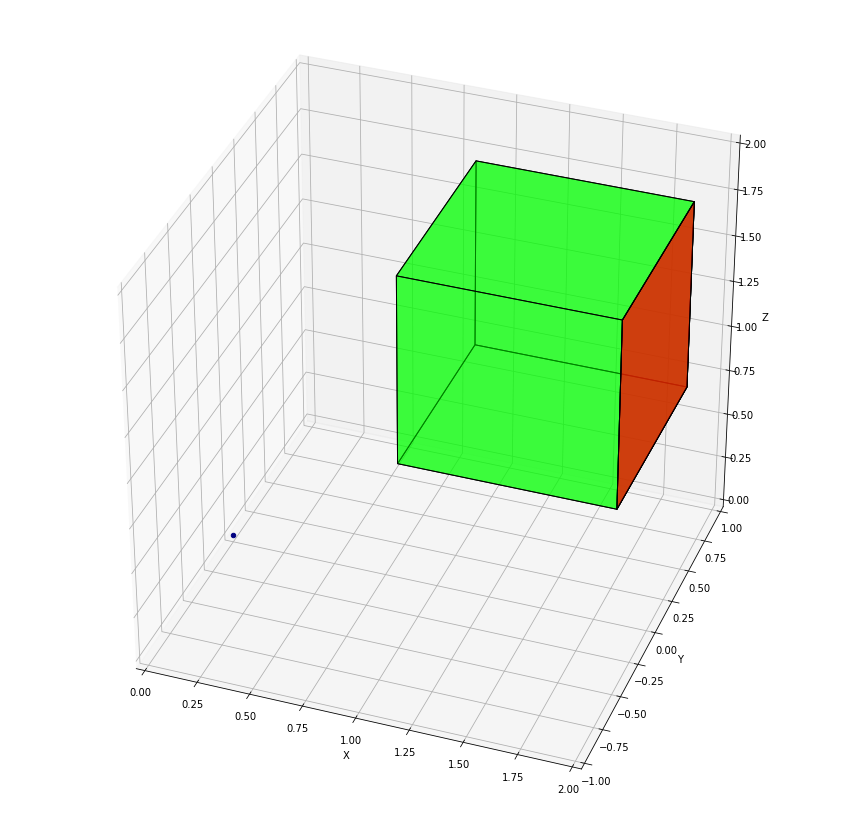

In [140]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.pyplot as plt

def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCubeAt2(positions, sizes, colors, **kwargs):
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s))
    return Poly3DCollection(np.concatenate(g), facecolors=np.repeat(colors,6), **kwargs)
    

positions = [(1,-1/2,1),(2,-1/2,1)]
sizes = [(1,1,1),(0,1,1)]
colors = ["lime","red"]

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor="k", alpha=0.5)
ax.add_collection3d(pc) 
ax.scatter(0,0,0, color='navy')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([0,2])
ax.set_ylim([-1,1])
ax.set_zlim([0,2])

ax.view_init(35,-70)